In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Description

- Describe
- There has been lot of confusion about the meta data, as there are various different meta data available out there. Over here below I have got the two most used meta data description from kaggle. So we are going to follow the second description(2 — description).

- 1 — description

-  age: The person's age in years
-  sex: The person's sex (1 = male, 0 = female)
-  cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
-  trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
-  chol: The person's cholesterol measurement in mg/dl
-  fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
-  restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
-  thalach: The person's maximum heart rate achieved
-  exang: Exercise induced angina (1 = yes; 0 = no)
-  oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
-  slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
-  ca: The number of major vessels (0-3)
-  thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
-  target: Heart disease (0 = no, 1 = yes)

- 2 — description
- cp: chest pain type
- Value 0: asymptomatic
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: typical angina
 
- restecg: resting electrocardiographic results
- Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
- Value 1: normal
- Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 
- slope: the slope of the peak exercise ST segment
- 0: downsloping; 1: flat; 2: upsloping
 
- thal
- Results of the blood flow observed via the radioactive dye.
 
- Value 0: NULL (dropped from the dataset previously)
- Value 1: fixed defect (no blood flow in some part of the heart)
- Value 2: normal blood flow
- Value 3: reversible defect (a blood flow is observed but it is not normal)
- This feature and the next one are obtained through a very invasive process for the patients. But, by themselves, they give a very good indication of the presence of a heart disease or not.
 
- target : 0 = disease, 1 = no disease

In [79]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv(r"C:\Users\lenovo\Python data\Projects\Heart_Disease_Prediction\heart_disease_data.csv")

In [80]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [82]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [83]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [84]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:title={'center':'Finding Null Values Using Heatmap\n'}>

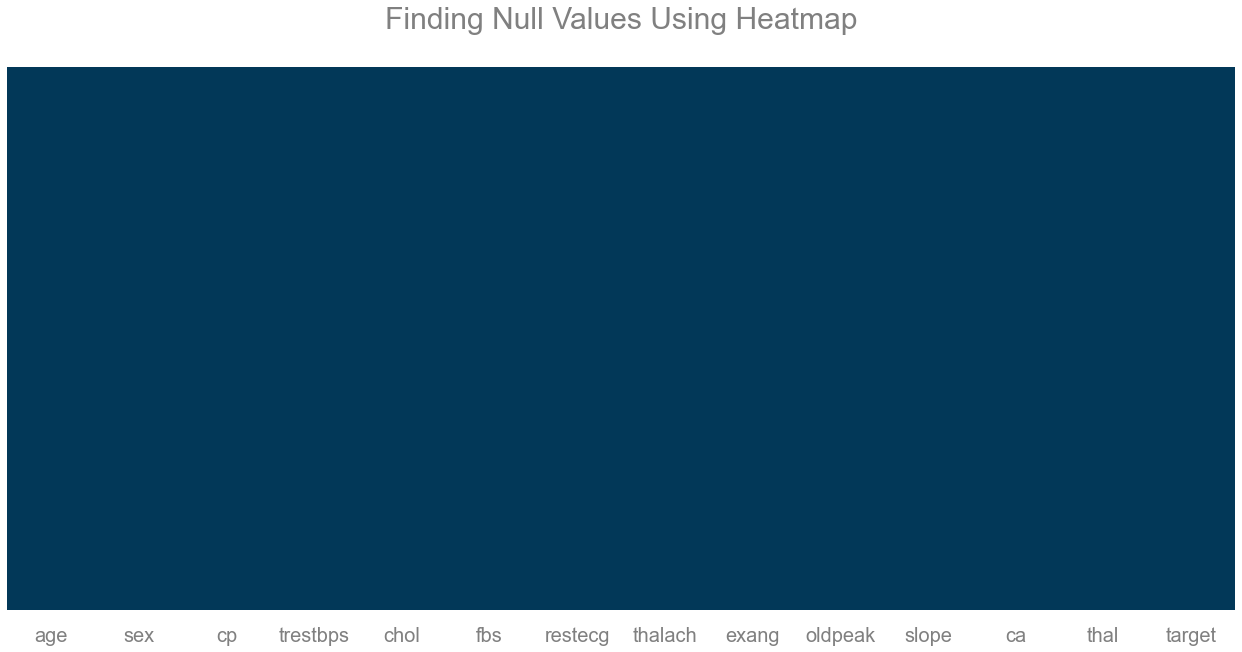

In [85]:
#visualizing Null values if it exists 
plt.figure(figsize=(22,10))
plt.xticks(size=20,color='grey')
plt.tick_params(size=12,color='grey')
plt.title('Finding Null Values Using Heatmap\n',color='grey',size=30)
sns.heatmap(heart_data.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='PuBu_r',
            )

- Dataset has no null values

In [86]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


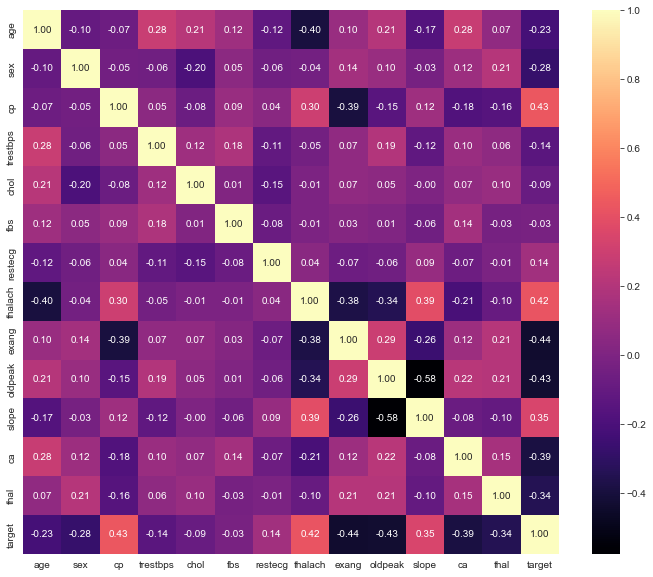

In [87]:
plt.figure(figsize=(12,10))
sns.heatmap(heart_data.corr(),annot=True,cmap="magma",fmt='.2f');

In [88]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

- 1 >>> Defective Heart

- 0 >>> Healthy Heart

### Splitting the Features and Target

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
train, test = train_test_split(heart_data, test_size=0.2, random_state= 2)

In [91]:
x_train = train.iloc[:, 0:-1]
y_train = train.iloc[:, -1]

In [92]:
x_test = test.iloc[:, 0:-1]
y_test = test.iloc[:, -1]

In [93]:
print(x_train.shape)
print(y_train.shape)
print('---------------------------')
print(x_test.shape)
print(y_test.shape)

(242, 13)
(242,)
---------------------------
(61, 13)
(61,)


## Model Training

### Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
model = LogisticRegression()

In [96]:
model.fit(x_train, y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Accuracy score

In [97]:
# accuracy on training data
x_train_prediction = model.predict(x_train)

In [98]:
from sklearn.metrics import accuracy_score

In [99]:
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [100]:
training_data_accuracy

0.8305785123966942

In [101]:
# accuracy on test data
x_test_prediction = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [113]:
confusion_matrix(y_test,x_test_prediction)

array([[26,  6],
       [ 0, 29]], dtype=int64)

In [114]:
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [115]:
test_data_accuracy

0.9016393442622951

### Decision Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
dt = DecisionTreeClassifier() 

In [108]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [110]:
pred = dt.predict(x_test)
pred

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [116]:
confusion_matrix(y_test, pred) 

array([[23,  9],
       [ 2, 27]], dtype=int64)

In [118]:
accuracy_score(y_test, pred)

0.819672131147541

### Random Forest

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
rf = RandomForestClassifier() 

In [136]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [137]:
pred1 = rf.predict(x_test)
pred1

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [138]:
confusion_matrix(y_test, pred1) 

array([[26,  6],
       [ 1, 28]], dtype=int64)

In [139]:
accuracy_score(y_test, pred1)

0.8852459016393442

### Naive Bayes

In [128]:
from sklearn.naive_bayes import MultinomialNB

In [129]:
nb = MultinomialNB() 

In [130]:
nb.fit(x_train, y_train)

MultinomialNB()

In [131]:
pred2 = nb.predict(x_test)
pred2

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

In [132]:
confusion_matrix(y_test, pred2) 

array([[24,  8],
       [ 2, 27]], dtype=int64)

In [133]:
accuracy_score(y_test, pred2)

0.8360655737704918

## Conclusion

- The model predicted with 90.16% accuracy. The model is more specific than sensitive.
- Model are giving good result on Logistic Regression algorithm.

### Building a Predictive System on Logistic Regression

In [140]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

In [141]:
# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
